# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and normalize
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


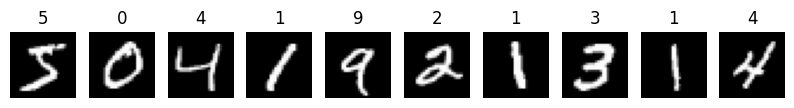

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8741 - loss: 0.4409 - val_accuracy: 0.9605 - val_loss: 0.1265
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9654 - loss: 0.1096 - val_accuracy: 0.9677 - val_loss: 0.1032
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9781 - loss: 0.0703 - val_accuracy: 0.9758 - val_loss: 0.0776
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 0.9703 - val_loss: 0.0952
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9763 - val_loss: 0.0860
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9883 - loss: 0.0352 - val_accuracy: 0.9778 - val_loss: 0.0925
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9782 - val_loss: 0.0841
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9925 - loss: 0.02

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1178
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 975    0    2    1    0    0    0    1    1    0]
 [   1 1122    3    3    0    0    1    2    3    0]
 [   5    0 1012    4    3    0    0    6    2    0]
 [   0    0    2 1000    0    5    0    2    1    0]
 [   2    0    4    0  962    0    2    3    0    9]
 [   2    0    0   19    0  863    3    0    4    1]
 [   8    3    2    1    3    8  928    1    3    1]
 [   0    2    7    5    0    0    0 1008    1    5]
 [   0    1    9   14    0    5    0    4  938    3]
 [   1    3    0   20   12    6    0    9    3  955]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.98      0.98       982
        

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

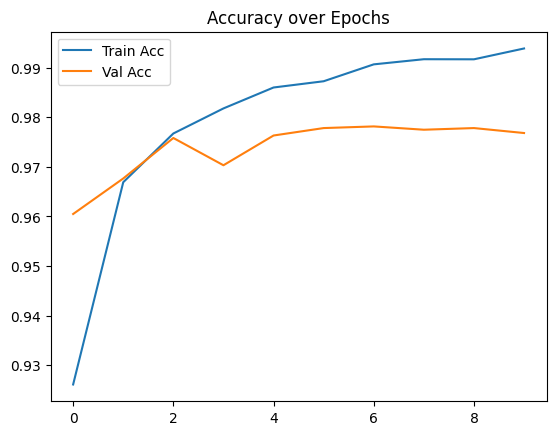

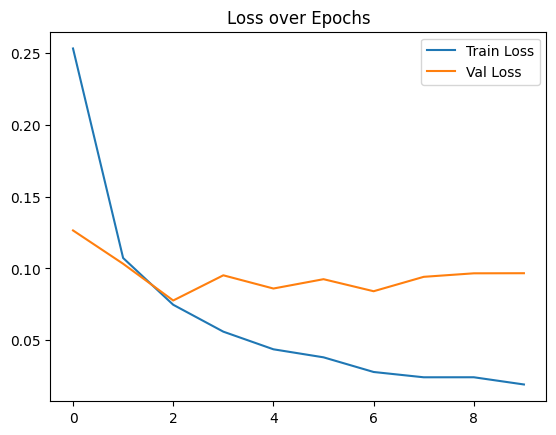

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()